# Airbnb Data Visualization

In [176]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
from numpy.polynomial.polynomial import polyfit

pd.set_option('display.max_columns', None)

listings = pd.read_csv("datasets/listings_original.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning:

Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.



## Data Cleaning

In [179]:
# Filter out Manhattan listings
listings.drop(listings[listings.neighbourhood_group_cleansed != 'Manhattan'].index, inplace = True)

# Drop listings with important missing values
listings.drop(listings[listings.bedrooms.isnull()].index, inplace = True)
listings.drop(listings[listings.bathrooms.isnull()].index, inplace = True)
listings.drop(listings[listings.price.isnull()].index, inplace = True)
listings.drop(listings[listings.availability_30.isnull()].index, inplace = True)
listings.drop(listings[listings.reviews_per_month.isnull()].index, inplace = True)
listings.drop(listings[listings.review_scores_rating.isnull()].index, inplace = True)
listings.drop(listings[listings.cleaning_fee.isnull()].index, inplace = True)
listings.drop(listings[listings.host_response_rate.isnull()].index, inplace = True)

# Filter out listings that have 0 availability every month
listings.drop(listings[listings.availability_30 == 0].index, inplace = True)

# Parse prices to int
listings['price_int'] = listings['price'].str.replace(',','').str[1:].astype(float)
listings['cleaningfee_int'] = listings['cleaning_fee'].str.replace(',','').str[1:].astype(float)
listings['hostresponserate_int'] = listings['host_response_rate'].str[:-1].astype(float)

#Remove outliers 
listings.drop(listings[listings.bedrooms > 15].index, inplace = True)
listings.drop(listings[listings.price_int > 7000].index, inplace = True)

final_listings = listings

## Adding/Categorising data

In [17]:
# # Add revenue to data

# revenue = final_listings['price_int'] * final_listings['reviews_per_month']
# final_listings['revenue'] = revenue
# final_listings.drop(final_listings[final_listings.revenue == 0].index, inplace = True)
# final_listings.drop(final_listings[final_listings.bedrooms == 0].index, inplace = True)
# final_listings['revenue_per_bedroom'] = final_listings['revenue'] / final_listings['bedrooms']



In [18]:
def draw_scatter(x,y, color_scatter = "#1E78B4", color_plot = 'r', label = ''):
    if label == '':
        plt.scatter(x, y, alpha = 0.4, c = color_scatter)
    else:
        plt.scatter(x, y, alpha = 0.4, c= color_scatter, label = label)
    a, b = polyfit(x,y,1)
    yfit = a + b*x
    plt.plot(x, yfit, color_plot)

## Possible confounding factor: availability_30

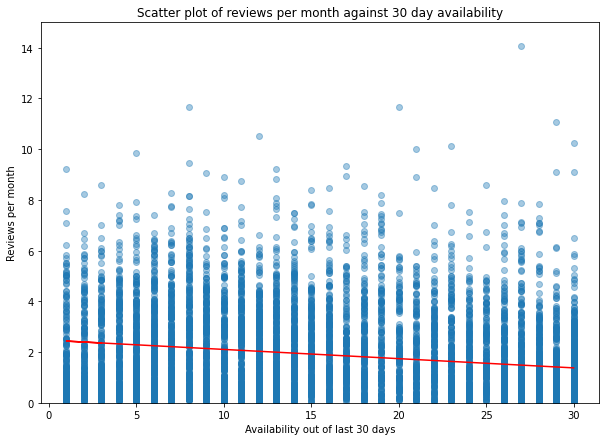

In [111]:
x = listings['availability_30']
y = listings['reviews_per_month']
plt.figure(figsize=(10,7))

draw_scatter(x,y)
plt.ylim(0,15)
plt.xlabel("Availability out of last 30 days")
plt.ylabel("Reviews per month")
plt.title("Scatter plot of reviews per month against 30 day availability")
plt.show()

## Monthly reviews against cleaning fee 

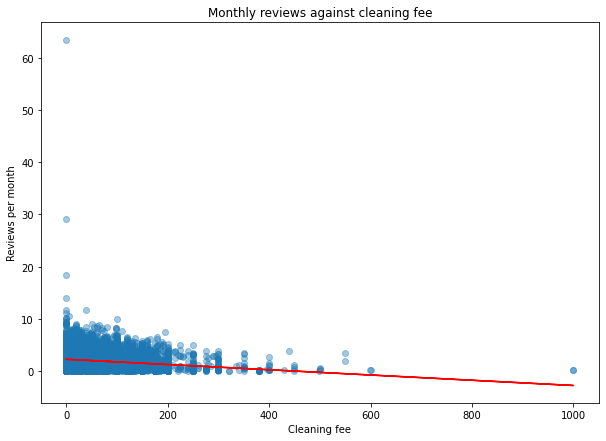

In [121]:
x = final_listings['cleaningfee_int']
y = final_listings['reviews_per_month']

plt.figure(figsize=(10,7))
plt.xlabel("Cleaning fee")
plt.ylabel("Reviews per month")
plt.title("Monthly reviews against cleaning fee")
draw_scatter(x,y)

## Monthly reviews against host response rate

(0.0, 30.0)

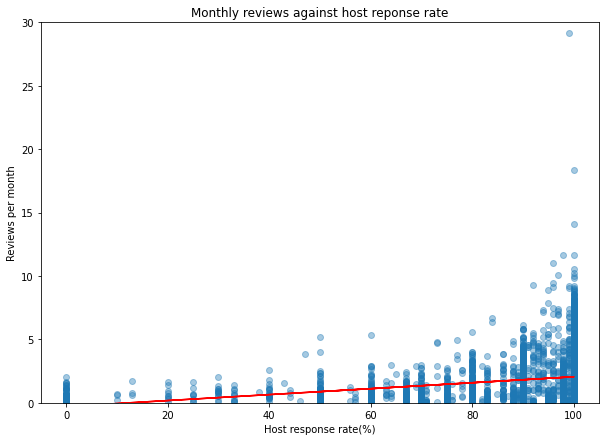

In [152]:
x = final_listings['hostresponserate_int']
y = final_listings['reviews_per_month']

plt.figure(figsize=(10,7))
plt.xlabel("Host response rate(%)")
plt.ylabel("Reviews per month")
plt.title("Monthly reviews against host reponse rate")
draw_scatter(x,y)
plt.ylim(0,30)

## Monthly Reviews against Number of Bedrooms

(0.0, 30.0)

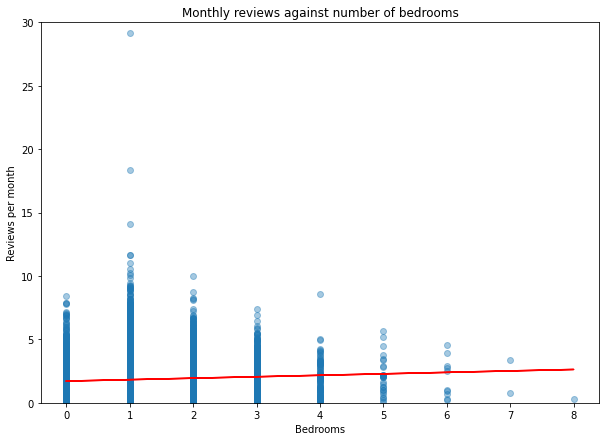

In [145]:
x = final_listings['bedrooms']
y = final_listings['reviews_per_month']

plt.figure(figsize=(10,7))
plt.xlabel("Bedrooms")
plt.ylabel("Reviews per month")
plt.title("Monthly reviews against number of bedrooms")
draw_scatter(x,y)
plt.ylim(0,30)

## Monthly Reviews, categorised by Superhost

In [140]:
# Turn superhost into categorial data
def superhost(data):
    return 1 if data == 't' else 0
final_listings['SUPERHOST'] = final_listings['host_is_superhost'].apply(superhost)

listings_superhost = final_listings.loc[final_listings['host_is_superhost'] == 't']
listings_not_superhost = final_listings.loc[final_listings['host_is_superhost'] == 'f']

# plt.figure(figsize=(10,7))
# x1 = listings_superhost['availability_30']
# y1 = listings_superhost['reviews_per_month']
# x2 = listings_not_superhost['availability_30']
# y2 = listings_not_superhost['reviews_per_month']

# draw_scatter(x1, y1, "#58B0A6", "#58B0A6", 'Superhost')
# draw_scatter(x2, y2, "#E48065", "#E48065", "Not Superhost")

# plt.xlabel('Number of bedrooms ')
# plt.ylabel('Reviews per month')
# plt.legend()
# plt.ylim(0, 30)
# plt.grid()
# plt.title('Reviews per month against number of bedrooms, categorized by superhosts')
# plt.show()

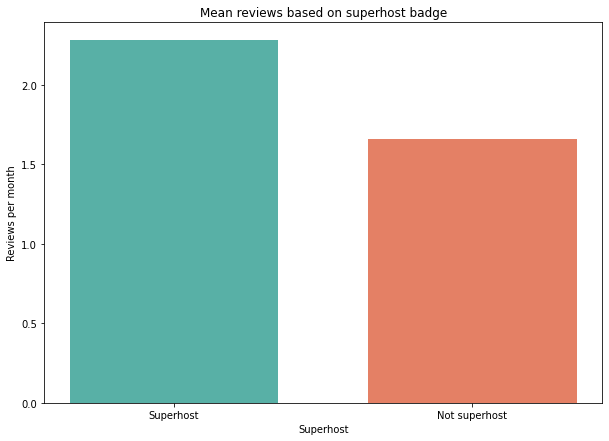

In [22]:
x_labels = ['Superhost', 'Not superhost']
plt.figure(figsize=(10,7))
mean_reviews = [listings_superhost['reviews_per_month'].mean(), listings_not_superhost['reviews_per_month'].mean()]
plt.bar(x_labels, mean_reviews, width = 0.7, color=["#58B0A6", "#E48065"])
plt.xlabel('Superhost')
plt.ylabel('Reviews per month')
plt.title('Mean reviews based on superhost badge')
plt.show()

## Monthly reviews by Room Type

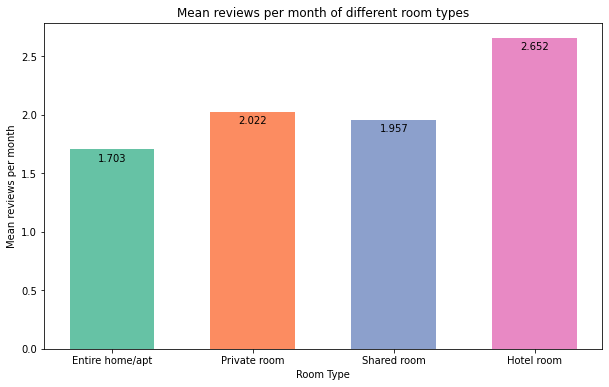

In [126]:
room_types = final_listings['room_type'].unique()
plt.figure(figsize=(10,6))
roomtype_reviews = []
colors = ["#66C2A5","#FC8C61", "#8CA0CC", "#E889C4"]
for room in room_types:
    roomtype_reviews.append(final_listings.loc[final_listings['room_type'] == room, 'reviews_per_month'].mean())
plt.bar(room_types, roomtype_reviews, width = 0.6, color = colors)

mean_labels = [str(round(mean_value, 3)) for mean_value in roomtype_reviews]
for i in range(len(mean_labels)):
    plt.text(x = i-0.1, y = roomtype_reviews[i] - 0.1, s = mean_labels[i])

plt.xlabel("Room Type")
plt.ylabel("Mean reviews per month")
plt.title("Mean reviews per month of different room types")
plt.show()

## Monthly reviews against price

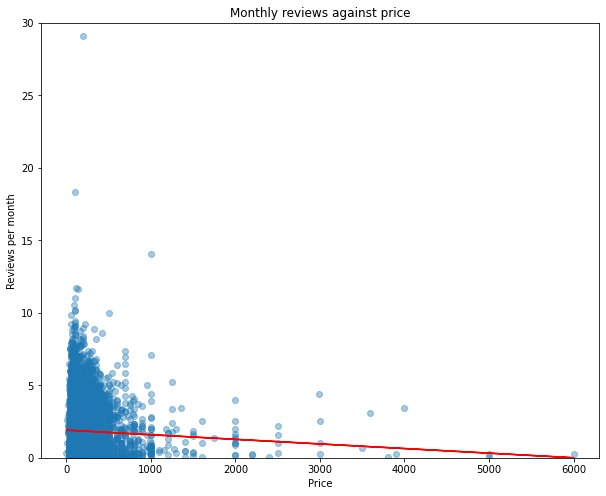

In [120]:
x = final_listings['price_int']
y = final_listings['reviews_per_month']

plt.figure(figsize=(10,8))
draw_scatter(x,y)
plt.ylim(0,30)

plt.xlabel("Price")
plt.ylabel("Reviews per month")
plt.title("Monthly reviews against price")
plt.show()

## Monthly reviews against review score

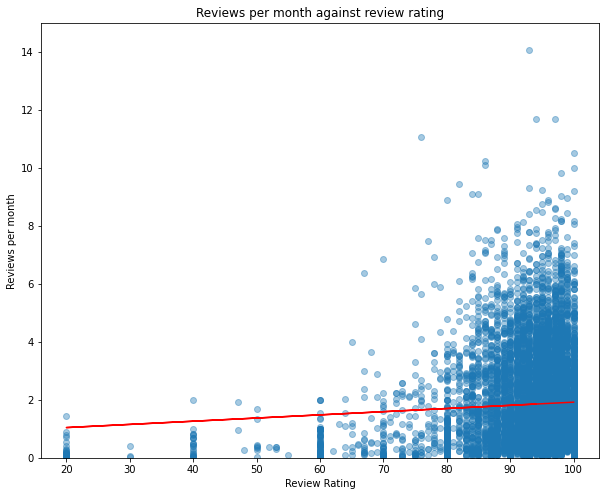

In [25]:
x = final_listings['review_scores_rating']
y = final_listings['reviews_per_month']

plt.figure(figsize=(10,8))
draw_scatter(x,y)

plt.ylim(0, 15)
plt.xlabel("Review Rating")
plt.ylabel("Reviews per month")
plt.title("Reviews per month against review rating")
plt.show()

## Monthly reviews by amenities

In [26]:
def parse_all_amenities(dataset, amenities_list):
    def parse_amenities(data, amenity):
        data_split = data[1:-1].split(',')
        if amenity in data_split:
            return 1
        else:
            return 0
    for amen in amenities_list:
        column_header = parse_column_header(amen)
        amenities = dataset['amenities']
        dataset[column_header] = amenities.apply(parse_amenities, args = (amen,))
    return dataset

def parse_column_header(original):
    return original.upper().replace(" ", "_").replace("\"", '').replace("/","_")

In [175]:
mylist = ['Wifi', 'TV', 'Heating', 'Kitchen', 'Breakfast', '"Family/kid friendly"', '"Air conditioning"']
final_listings = parse_all_amenities(final_listings, mylist)

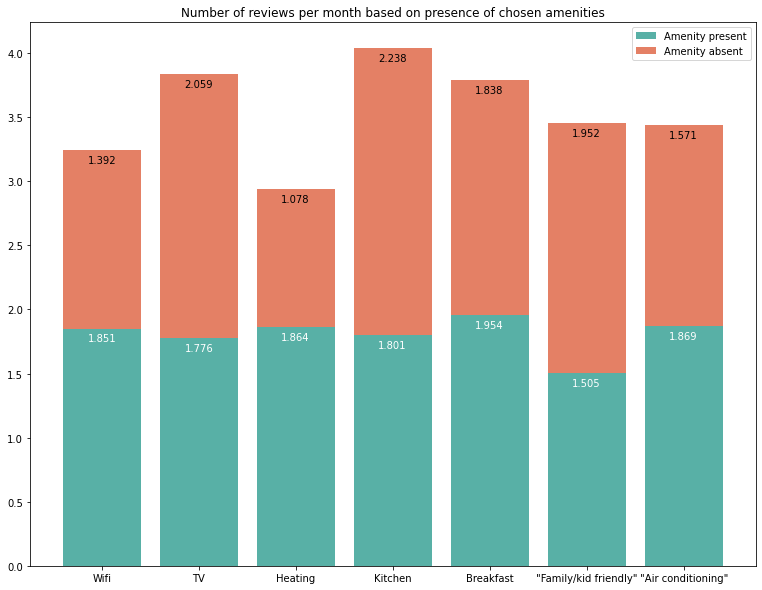

In [84]:
amenities_present = [final_listings.loc[final_listings[parse_column_header(amen)] == 1, 'reviews_per_month'].mean() for amen in mylist]
amenities_absent = [final_listings.loc[final_listings[parse_column_header(amen)] == 0, 'reviews_per_month'].mean() for amen in mylist]
plt.figure(figsize=(13, 10))

p1 = plt.bar(mylist, amenities_present, color = "#58B0A6", label = 'Amenity present')
p2 = plt.bar(mylist, amenities_absent, color = "#E48065", bottom = amenities_present, label = 'Amenity absent')

present_labels = [str(round(mean_value, 3)) for mean_value in amenities_present]
absent_labels = [str(round(mean_value, 3)) for mean_value in amenities_absent]
for i in range(len(present_labels)):
    plt.text(x = i-0.15, y = amenities_present[i] - 0.1, s = present_labels[i], color = 'w')
    plt.text(x = i-0.15, y = amenities_present[i] + amenities_absent[i] - 0.1, s = absent_labels[i])
plt.legend()
plt.title("Number of reviews per month based on presence of chosen amenities")
plt.show()

## Monthly reviews by number of bathrooms

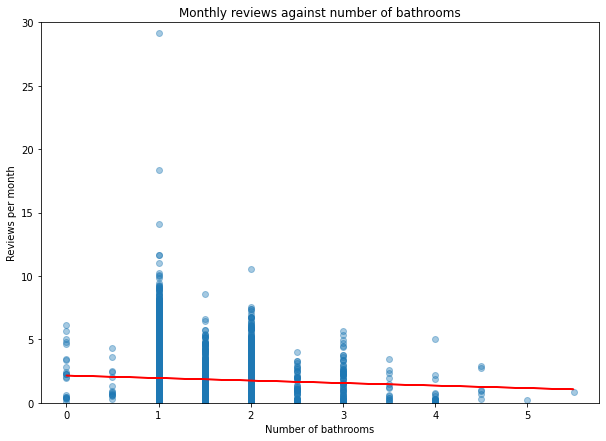

In [182]:
x = final_listings['bathrooms']
y = final_listings['reviews_per_month']

plt.figure(figsize=(10,7))
plt.xlabel("Number of bathrooms")
plt.ylabel("Reviews per month")
plt.title("Monthly reviews against number of bathrooms")
draw_scatter(x,y)
plt.ylim(0,30)
plt.show()

## Monthly reviews by accommodates

(0.0, 30.0)

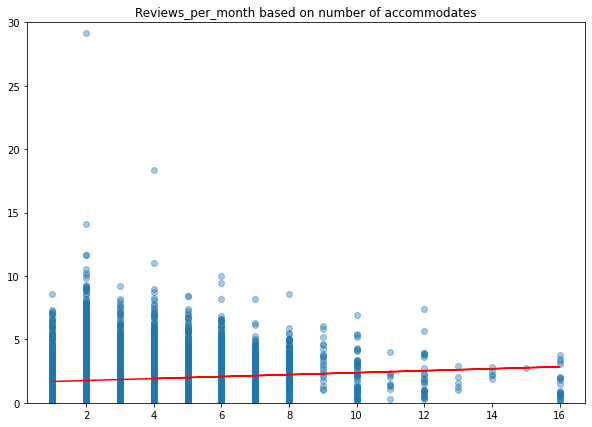

In [104]:
x2 = final_listings['accommodates']
y2 = final_listings['reviews_per_month']
plt.figure(figsize=(10, 7))
draw_scatter(x2,y2)
plt.title("Reviews_per_month based on number of accommodates")
plt.ylim(0,30)

## Monthly reviews by Distance to Landmark

Four landmarks used:  
1) times square: 40.7580° N, 73.9855° W  
2) empire state building: 40.7484° N, 73.9857° W  
3) central park: 40.7829° N, 73.9654° W  
4) statue of liberty: 40.6892° N, 74.0445° W  


In [32]:
landmarks = {"times_square": (40.7580, -73.9855), 
             "empire_state_building":(40.7484, -73.9857), 
             "central_park": (40.7829, -73.9654), 
             "statue_of_liberty": (40.6892, -74.0445)}


for landmark, location in landmarks.items():
    lat, long = location
    distance = (abs(final_listings['latitude'] - lat)**2 + \
                                            abs(final_listings['longitude'] - long)**2)**0.5
    final_listings[landmark + "_distance"] = distance
   
    
final_listings['min_distance_to_landmark'] = final_listings.iloc[:, -5:].min(axis=1)
final_listings['min_distance_to_landmark'].max()

0.10964025264472751

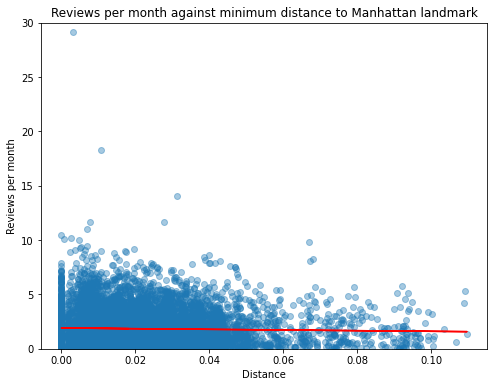

In [119]:
x = final_listings['min_distance_to_landmark']
y = final_listings['reviews_per_month']
plt.figure(figsize=(8,6))
draw_scatter(x,y)
plt.xlabel("Distance")
plt.ylabel("Reviews per month")
plt.title("Reviews per month against minimum distance to Manhattan landmark")
plt.ylim(0, 30)
plt.show()

In [34]:
x.describe()

count    8295.000000
mean        0.021910
std         0.016979
min         0.000000
25%         0.009877
50%         0.018930
75%         0.029955
max         0.109640
Name: min_distance_to_landmark, dtype: float64

## Regression Model

In [173]:
modeleq = 'reviews_per_month ~  price_int + cleaningfee_int + hostresponserate_int  +  accommodates + np.sqrt(bedrooms) + bathrooms + SUPERHOST + TV + HEATING + KITCHEN + AIR_CONDITIONING  + FAMILY_KID_FRIENDLY + min_distance_to_landmark'
out = sm.ols(modeleq, final_listings).fit()
print(out.summary2())
print("Adjusted R-square: " + str(out.rsquared_adj))

                      Results: Ordinary least squares
Model:                 OLS                 Adj. R-squared:       0.141     
Dependent Variable:    reviews_per_month   AIC:                  30605.9583
Date:                  2020-05-06 17:31    BIC:                  30703.4425
No. Observations:      7810                Log-Likelihood:       -15289.   
Df Model:              13                  F-statistic:          99.68     
Df Residuals:          7796                Prob (F-statistic):   2.17e-248 
R-squared:             0.143               Scale:                2.9422    
---------------------------------------------------------------------------
                          Coef.   Std.Err.    t     P>|t|   [0.025   0.975]
---------------------------------------------------------------------------
Intercept                 -0.2964   0.1979  -1.4973 0.1344  -0.6844  0.0916
price_int                 -0.0002   0.0001  -2.0397 0.0414  -0.0004 -0.0000
cleaningfee_int           -0.0077 

In [78]:
final_listings.to_csv(r'listings_edited.csv')